# Задание 3

Вы работаете продуктовым аналитиком в агрегаторе такси SkyTaxi, и ваша задача — оценить результаты А/В-теста.

Тест предполагает введение новой платежной механики, которая должна немного снизить цену на услугу.

Тест проводится путем разделения всех просмотров цены на группы А и В.

> Просмотр — это событие, когда клиент вводит в приложении точку В и видит отображенную цену заказа. После этого он может или конвертироваться в созданный заказ (если цена его устроит), или нет.

Ваша задача — исследовать результат и понять, влияет ли повышение цены на конверсию из просмотра в создание заказа.

Для выполнения задания воспользуйтесь Python и оформите результат как файл .ipynb (текстовые выводы оформить там же).

Скачайте файл с данными по [ссылке](https://drive.google.com/drive/folders/1tOQ51sbgH7eT8f25OsR1AMTPL5k-nwk8)

### Установка и импорт библиотек

In [18]:
import pandas as pd
import numpy as np
from scipy import stats

from matplotlib import pyplot as plt

### Задание 3.1

Импортируйте файл с данными в Jupyter Notebook и расшифруйте идентификаторы городов с помощью листа city_dict

In [2]:
path = 'Data\\'
file_name = 'Финальная первичная аттестация. Вариант 1. Python.xlsx'

dataset = pd.read_excel(path + file_name, sheet_name='Dataset')
city_dict = pd.read_excel(path + file_name, sheet_name='city_dict')

In [3]:
data = pd.merge(dataset, city_dict, on='id_city').drop(columns=['id_city'])
data.sample(5)

,id_view,time_view,id_group,nflag_order,name_city
13956,10457173353,2023-01-22 19:01:20.942,0,1,Санкт-Петербург
3385,10457181848,2023-01-08 07:29:54.740,0,1,Москва
15528,10457163464,2023-01-08 05:15:42.996,0,1,Санкт-Петербург
6466,10457191289,2023-01-16 15:26:14.530,1,0,Москва
10474,10457133800,2023-01-31 03:11:19.418,1,1,Москва


### Задание 3.2

Рассчитайте результаты А/В-теста и с помощью статистического критерия сделайте вывод.

In [4]:
def t_test(test, control, alpha=0.05):
    '''Функция печатает выводы тестирования выборок Т-тестом, сравнивает средние выборок и возвращает True если стат.разница'''
    
    statistic, pvalue = stats.ttest_ind(test, control)
    
    if pvalue > alpha:
        print(f'Выборки не имеют существенной разницы. {pvalue = }')
        return False
    else:
        print(f'Выборки различны. {pvalue = }')
        print(f'При чем разница средних выборок составляет:', np.round((test.mean() - control.mean()) * 100, 2), '%')
        return True

In [9]:
tst = data.loc[data['id_group'] == 1, 'nflag_order']
ctr = data.loc[data['id_group'] == 0, 'nflag_order']

_ = t_test(tst, ctr)

Выборки различны. pvalue = 5.1365957325220535e-21
При чем разница средних выборок составляет: 6.07 %


### Задание 3.3

Запустите цикл, который пробежится по всем городам в датасете. Выявите те города, в которых есть статистически значимая разница между группами А и В. Создайте переменную типа «список», которая будет хранить эти города.

In [14]:
cities = []

for city in data['name_city'].unique():
    df = data.loc[data['name_city'] == city]
    tst = df.loc[df['id_group'] == 1, 'nflag_order']
    ctr = df.loc[df['id_group'] == 0, 'nflag_order']
    
    print('--' * 5, city, '--' * 5)
    res = t_test(tst, ctr); print()
    
    if res:
        cities.append(city)
        
print(f'{cities = }')

---------- Новосибирск ----------
Выборки не имеют существенной разницы. pvalue = 0.13822636677161423

---------- Москва ----------
Выборки различны. pvalue = 1.368947706664987e-13
При чем разница средних выборок составляет: 7.47 %

---------- Санкт-Петербург ----------
Выборки различны. pvalue = 1.8595141124883944e-07
При чем разница средних выборок составляет: 7.08 %

---------- Казань ----------
Выборки различны. pvalue = 0.0023855694044274188
При чем разница средних выборок составляет: 8.22 %

---------- Архангельск ----------
Выборки не имеют существенной разницы. pvalue = 0.0511754082950276

---------- Челябинск ----------
Выборки не имеют существенной разницы. pvalue = 0.18541963354338323

---------- Сочи ----------
Выборки не имеют существенной разницы. pvalue = 0.7646178932512717

---------- Хабаровск ----------
Выборки не имеют существенной разницы. pvalue = 0.156865633792813

---------- Нижний Новгород ----------
Выборки не имеют существенной разницы. pvalue = 0.930103790978

### Задание 3.4

Создайте дополнительную колонку со значением 0 или 1 в зависимости от часа заказа. 1 — если это час пик (возьмите, например, 7, 8, 9, 10, 17, 18, 19, 20), а 0 — все остальные часы. Проверьте результат А/В-теста по отдельности на пиковых и непиковых заказах и сделайте выводы.

---
*Для выполнения данного задания для начала определимся что есть `час-пик`, на примере города Москвы*

In [25]:
# df = data.loc[:, ['time_view', 'nflag_order']]
df = data.loc[data['name_city'] == 'Москва', ['time_view', 'nflag_order']]

df['hour'] = df['time_view'].dt.hour
df_gb = df.groupby('hour').agg(sum_orders = ('nflag_order', 'sum')).reset_index()
# df_gb

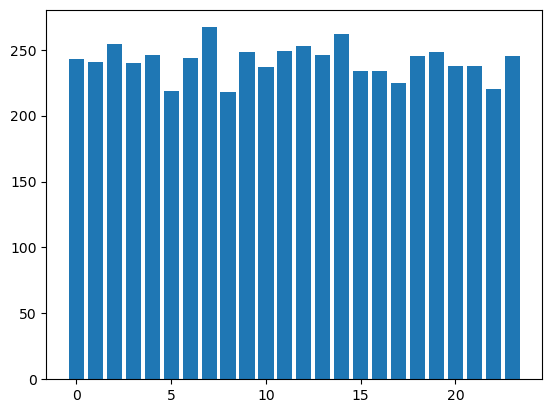

In [26]:
plt.bar(df_gb['hour'], df_gb['sum_orders'], label='График почасовой загрузки.')
plt.show()

*По визуализации слабо очевидно какое время возьмем за основу, предлагаю для анализа взять два интервала 7-9 часов и 16-18 часов*

In [29]:
peak_hours = [7, 8, 9, 16, 17, 18]
data['peak'] = np.where(data['time_view'].dt.hour.isin(peak_hours), 1, 0)

*Выборка вне пиковых часов*

In [30]:
df = data.loc[data['peak'] == 0] 

ctr = df.loc[df['id_group'] == 0, 'nflag_order']
tst = df.loc[df['id_group'] == 1, 'nflag_order']

_ = t_test(tst, ctr)

Выборки различны. pvalue = 8.063263936044878e-16
При чем разница средних выборок составляет: 5.99 %


*Выборка в часы пик*

In [31]:
df = data.loc[data['peak'] == 1] 

ctr = df.loc[df['id_group'] == 0, 'nflag_order']
tst = df.loc[df['id_group'] == 1, 'nflag_order']

_ = t_test(tst, ctr)

Выборки различны. pvalue = 1.0545045204948541e-06
При чем разница средних выборок составляет: 6.35 %


### Задание 3.5

Опишите ваши результаты. Ваши выводы можно оформить внутри тетрадки .ipynb.

**Вывод:**

> После проведенного исследования эксперимент по внедрению новой платежной механики дал положительный результат.

> Однако если оценить детали, то мы увидим что сумарно прирост конверсии из просмотра в заказ составил около 6%, причем положительный результат был зафиксирован лишь в трех крупных городах `['Москва', 'Санкт-Петербург', 'Казань']` (для каждого на 7-8%).

> Тест в часы пик показал различие всего лишь в 0,36%

> Предлагаю оценить MDE результата и внедрить новый механизм только в этих городах, или же продолжить поиск альтернативных механизмов увеличения конверсий.